In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
import keras

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
idx = 555
print(y_train[idx])

2


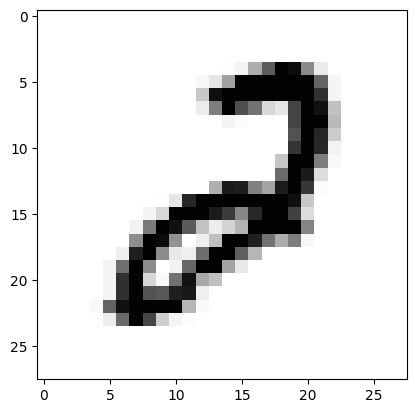

In [ ]:
plt.imshow(x_train[idx], cmap="Greys")
plt.show()

In [ ]:
print(x_train[idx])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   3  24 108 180
  253 244 138  38   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  17  47 118 252 252 252
  252 253 252 173  21   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  82 242 253 252 252 252
  252 253 252 215  21   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 150 253 193 160  66
   45 201 252 240  90   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  23   

In [ ]:
#4d form as input i.e. size, 28, 28, 1 (Grey scale = 1 else 3 for RGB)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_layer = (28, 28, 1)

In [ ]:
# normalizing int -> float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize
x_train /= 255
x_test /= 255

In [ ]:
print(x_train[idx])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:
from keras.models import Sequential
from keras import layers

model = Sequential()

model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding="same"))

model.add(layers.AveragePooling2D(pool_size=(5, 5), strides=(1, 1), padding='valid'))

model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))

model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="same"))

model.add(layers.Flatten())

model.add(layers. Dense (84, activation='tanh' ))

model.add(layers. Dense( 10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 24, 24, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 10, 10, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 120)       48120     
                                                                 
 flatten (Flatten)           (None, 12000)             0

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

hist = model.fit(x=x_train, y=y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/15
469/469 [==============================] - 149s 307ms/step - loss: 0.7770 - accuracy: 0.8058 - val_loss: 0.3657 - val_accuracy: 0.8957
Epoch 2/15
469/469 [==============================] - 139s 296ms/step - loss: 0.3296 - accuracy: 0.9040 - val_loss: 0.2838 - val_accuracy: 0.9168
Epoch 3/15
469/469 [==============================] - 135s 289ms/step - loss: 0.2697 - accuracy: 0.9211 - val_loss: 0.2411 - val_accuracy: 0.9299
Epoch 4/15
469/469 [==============================] - 132s 281ms/step - loss: 0.2353 - accuracy: 0.9314 - val_loss: 0.2101 - val_accuracy: 0.9374
Epoch 5/15
469/469 [==============================] - 134s 287ms/step - loss: 0.2113 - accuracy: 0.9377 - val_loss: 0.1922 - val_accuracy: 0.9448
Epoch 6/15
469/469 [==============================] - 130s 278ms/step - loss: 0.1922 - accuracy: 0.9435 - val_loss: 0.1751 - val_accuracy: 0.9489
Epoch 7/15
469/469 [==============================] - 133s 284ms/step - loss: 0.1770 - accuracy: 0.9488 - val_loss: 0.1645 -